In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.6 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.4/38.6 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.5/38.6 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.0/38.6 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.6 MB 5.1 MB/s eta 0:00:08
   -- ------------------------------------- 2.5/38.6 MB 6.2 MB/s eta 0:00:06
   ---- ----

In [31]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
data_path = "D:/Users/extracted_images"
image_size = 45

In [9]:
#Loading Data
def load_data(data_path, image_size):
    data = []
    labels = []
    
    for folder in os.listdir(data_path):
        label = folder
        folder_path = os.path.join(data_path, folder)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                data.append(img)
                labels.append(label)
    
    return np.array(data), np.array(labels)

In [10]:
data, labels = load_data(data_path, image_size)

#Checking the size of the downloaded data
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

Data shape: (375974, 45, 45)
Labels shape: (375974,)


In [13]:
labels

array(['!', '!', '!', ..., '}', '}', '}'], dtype='<U13')

## Preprocessing

In [14]:
#Data Normalization
data = data / 255.0
data = data.reshape(data.shape[0], image_size, image_size, 1)

In [15]:
#Class Label Encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [18]:
#Checking the sizes of training and test sets
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (300779, 45, 45, 1)
Test data shape: (75195, 45, 45, 1)


## Model CNN

In [24]:
# Create model
model = Sequential([
    Input(shape=(image_size, image_size, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

#Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#Model structure inference
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 43, 43, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 19, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 82)                  │          10,578 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,834 (979.82 KB)

 Trainable params: 250,834 (979.82 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

In [28]:
#Model training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=20, 
                    validation_data=(X_test, y_test))

#Saving model
model.save('math_symbol_recognizer.keras')

Epoch 1/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 146s 16ms/step - accuracy: 0.8356 - loss: 0.5716 - val_accuracy: 0.9060 - val_loss: 0.3115
Epoch 2/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.8357 - loss: 0.5719 - val_accuracy: 0.8985 - val_loss: 0.3283
Epoch 3/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 154s 16ms/step - accuracy: 0.8376 - loss: 0.5684 - val_accuracy: 0.9050 - val_loss: 0.3079
Epoch 4/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 159s 17ms/step - accuracy: 0.8374 - loss: 0.5675 - val_accuracy: 0.9045 - val_loss: 0.3137
Epoch 5/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 178s 19ms/step - accuracy: 0.8371 - loss: 0.5662 - val_accuracy: 0.8989 - val_loss: 0.3262
Epoch 6/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 177s 19ms/step - accuracy: 0.8372 - loss: 0.5719 - val_accuracy: 0.9004 - val_loss: 0.3260
Epoch 7/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 181s 19ms/step - accuracy: 0.8356 - loss: 0.5710 - val_accuracy: 0.8965 - val_loss: 0.3418
Epoch 8/20
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 167s 18ms/step - accuracy: 

In [29]:
#Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

2350/2350 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9021 - loss: 0.3228
Test accuracy: 90.51%


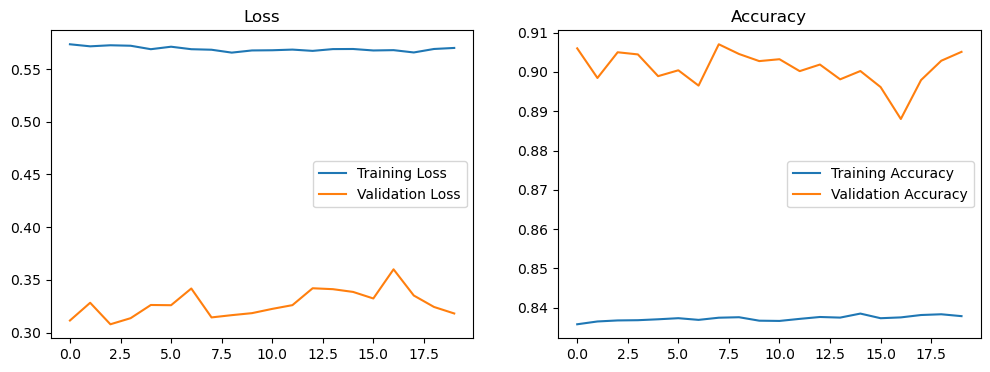

In [32]:
#Visualization of learning history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()